# preprocessing and analysis of brain data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne import combine_evoked
from mne.minimum_norm import apply_inverse
from mne.datasets.brainstorm import bst_auditory
from mne.io import read_raw_ctf

In [46]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / 'MEG' / 'sample' /
                        'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /Users/riccardotedoldi/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [3]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.3 MB, data not loaded>
<Info | 15 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


In [14]:
raw.get_data().shape

(376, 41700)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 13.639 (s)


/Users/riccardotedoldi/mambaforge/envs/uri/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


Using qt as 2D backend.
Using pyopengl with version 3.1.6


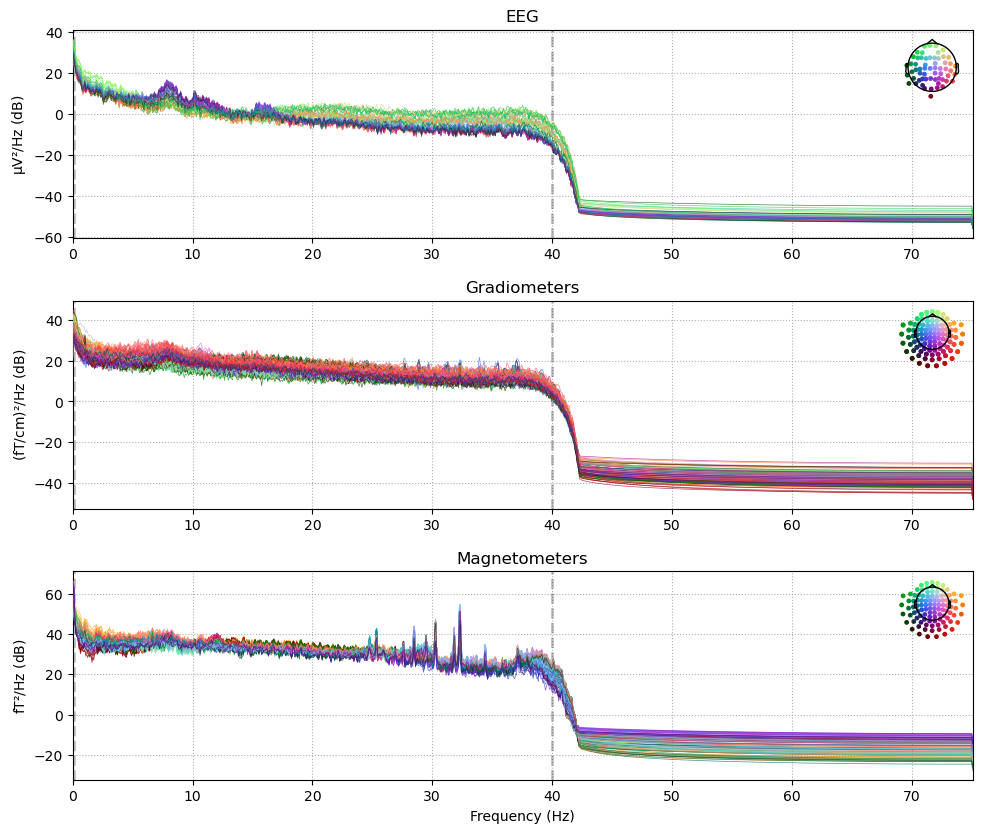

Channels marked as bad:
['MEG 2443', 'EEG 053']


In [4]:
# here we show the power spectral density (PSD) for each sensor type with plot_psd
raw.plot_psd()
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 60 components
Fitting ICA took 6.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


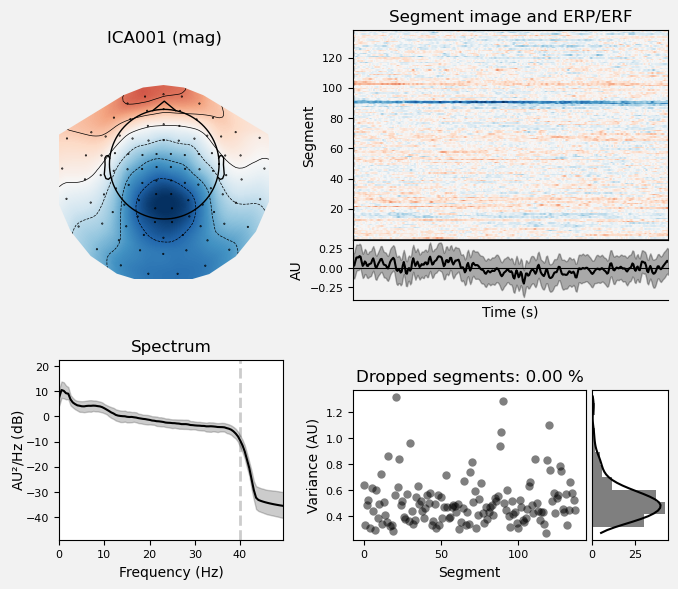

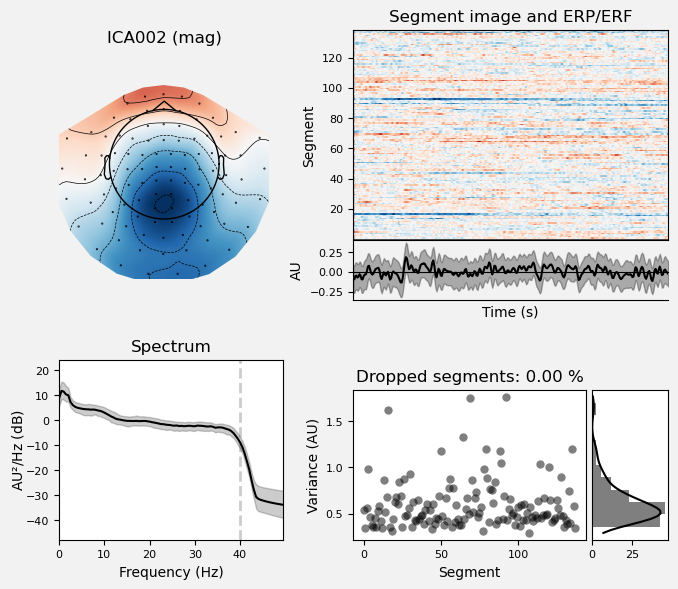

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [17]:
# set up and fit the ICA
# https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html#tut-artifact-ica
ica = mne.preprocessing.ICA(n_components=60, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


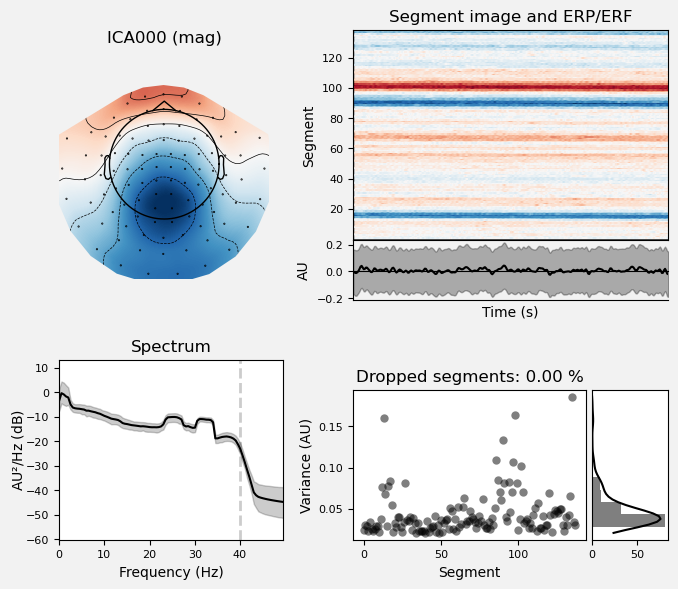

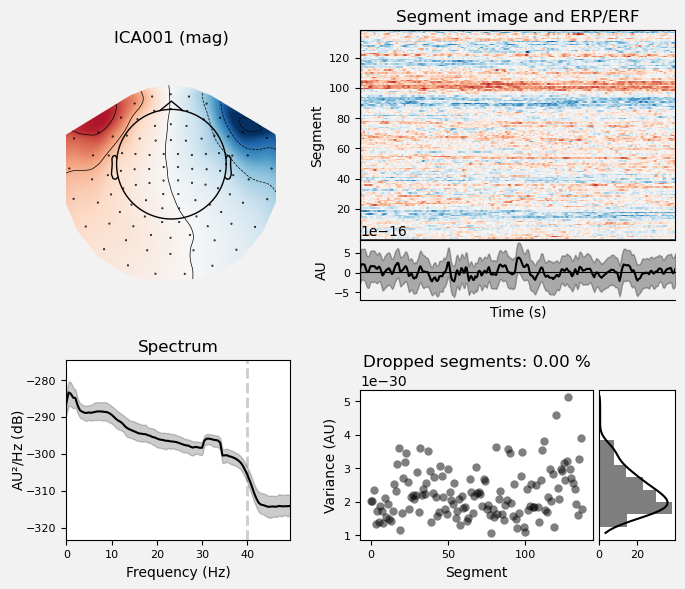

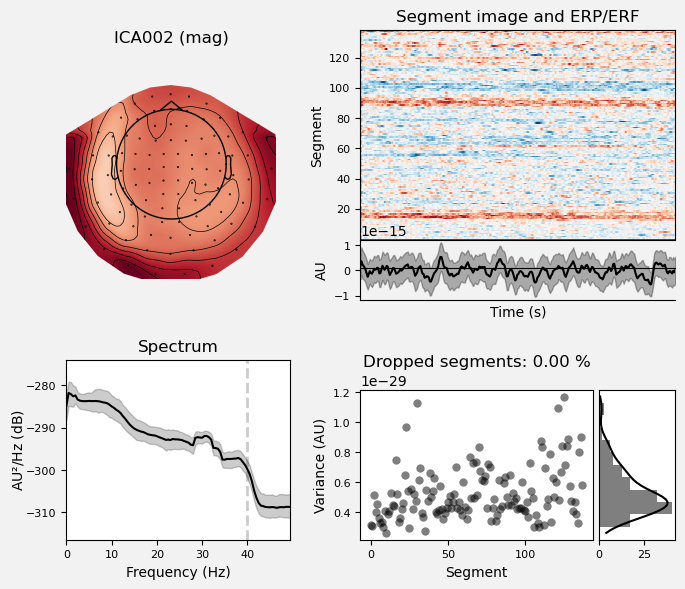

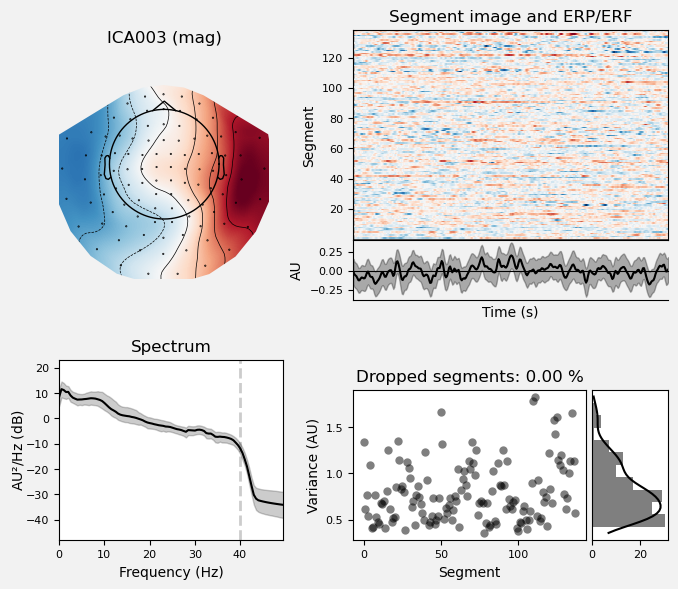

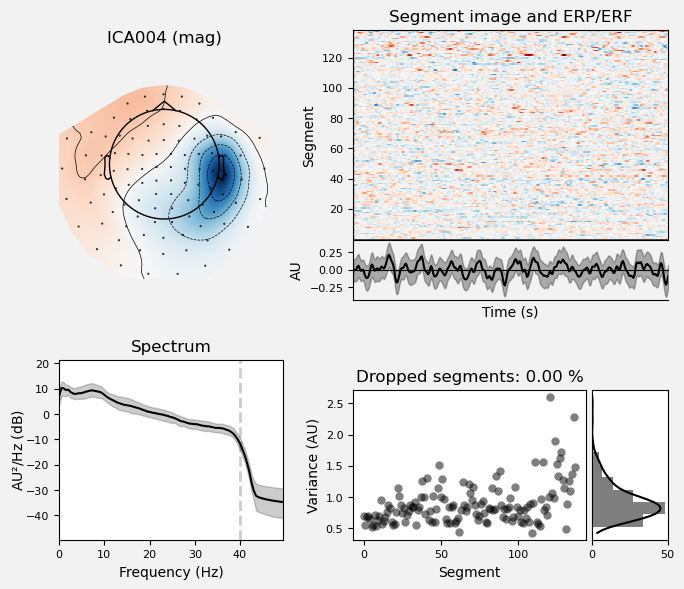

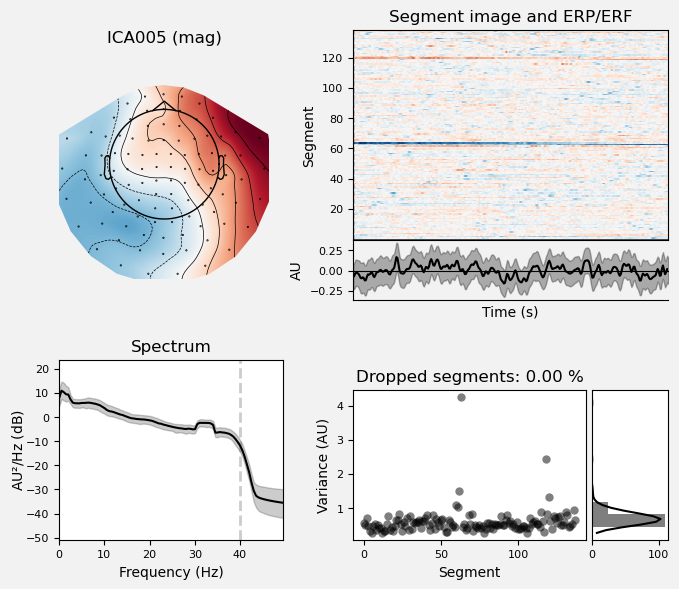

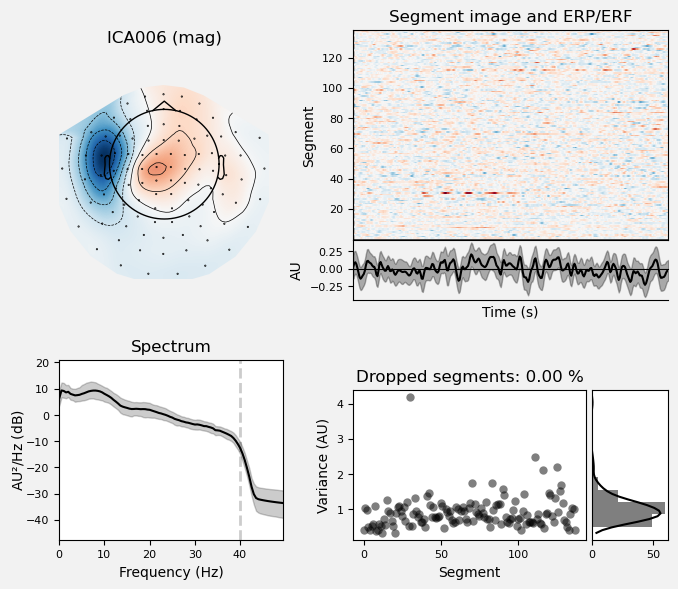

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [13]:
ica.plot_properties(raw, picks=[0, 1, 2, 3, 4, 5, 6])

Once we’re confident about which component(s) we want to remove, we pass them as the exclude parameter and then apply the ICA to the raw signal. The apply method requires the raw data to be loaded into memory (by default it’s only read from disk as-needed), so we’ll use load_data first. We’ll also make a copy of the Raw object so we can compare the signal before and after artifact removal side-by-side:

In [6]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']


chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration=4)
raw.plot(order=chan_idxs, start=12, duration=4)

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components
Using pyopengl with version 3.1.6
Using pyopengl with version 3.1.6


Channels marked as bad:
['MEG 2443', 'EEG 053']
Channels marked as bad:
['MEG 2443', 'EEG 053']


the first column and integer event ID in the last column; the middle column is usually ignored and the third one represent the id event.

In [8]:
events = mne.find_events(raw)

# print the first 10 events
print(events[:10])

event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

319 events found
Event IDs: [ 1  2  3  4  5 32]
[[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]
 [7506    0    3]
 [7612    0    1]
 [7709    0    4]
 [7810    0    2]
 [7916    0    3]]


<Figure size 1000x400 with 0 Axes>

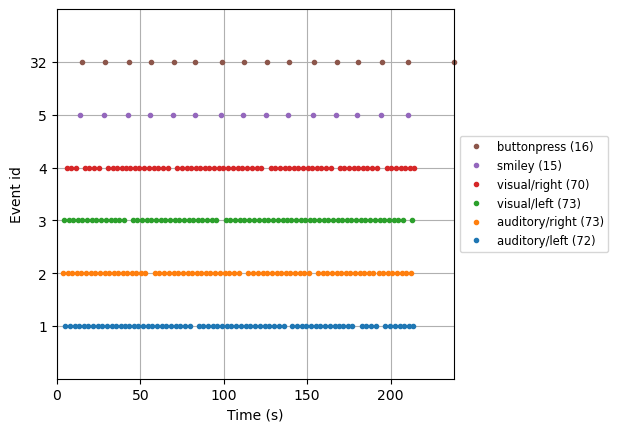

In [12]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Using data from preloaded Raw for 319 events and 106 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EEG : ['EEG 008']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
10 bad epochs dropped
Dropped 7 epochs: 121, 195, 258, 271, 273, 274, 275
Not setting metadata
136 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
136 matchi

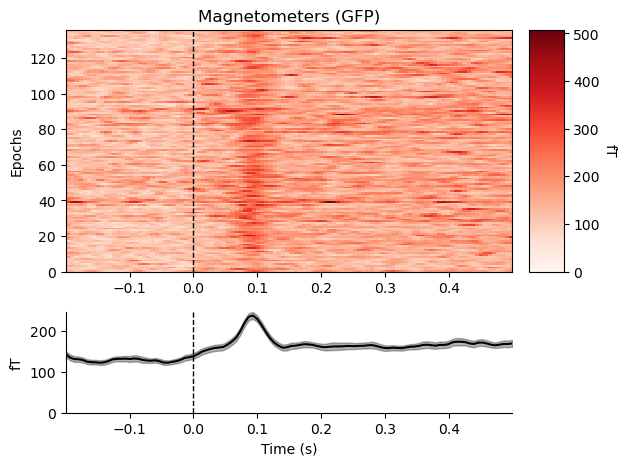

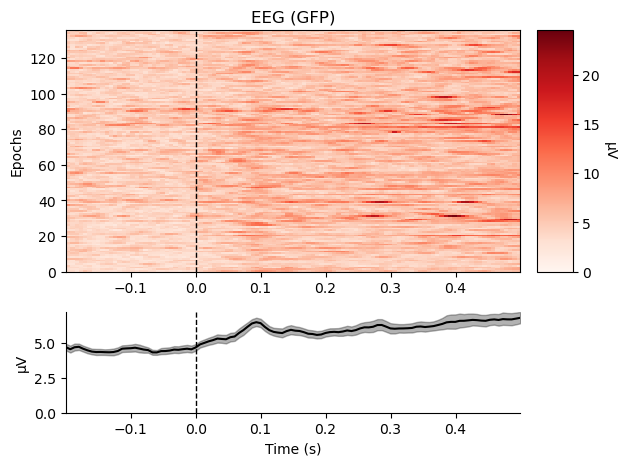

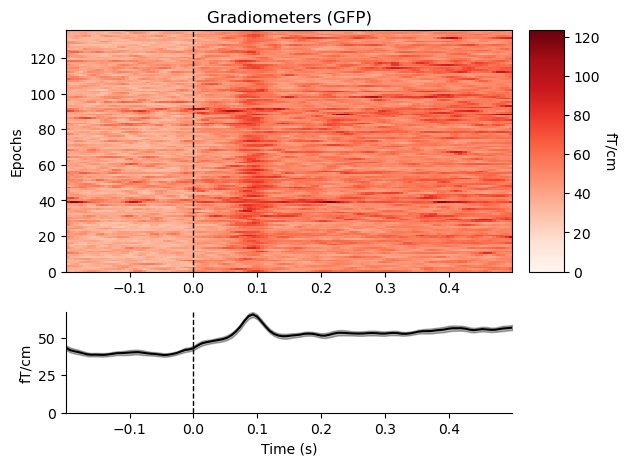

[<Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>]

In [18]:
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV


epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

conds_we_care_about = ['auditory/left', 'auditory/right',
                       'visual/left', 'visual/right']
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']

del raw, epochs  # free up memory

aud_epochs.plot_image()


Multiple channel types selected, returning one figure per type.
combining channels using "gfp"
combining channels using "gfp"


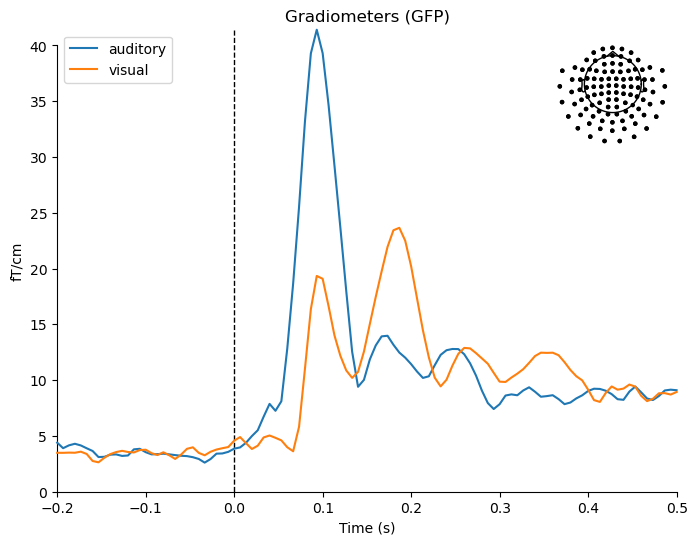

combining channels using "gfp"
combining channels using "gfp"


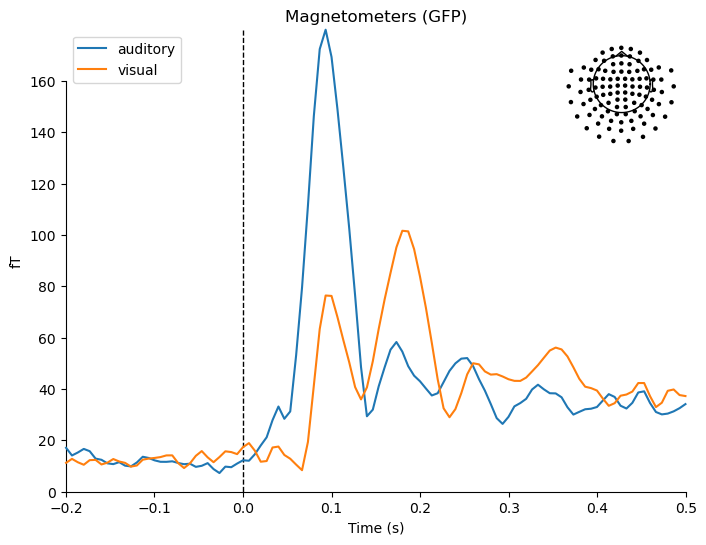

combining channels using "gfp"
combining channels using "gfp"


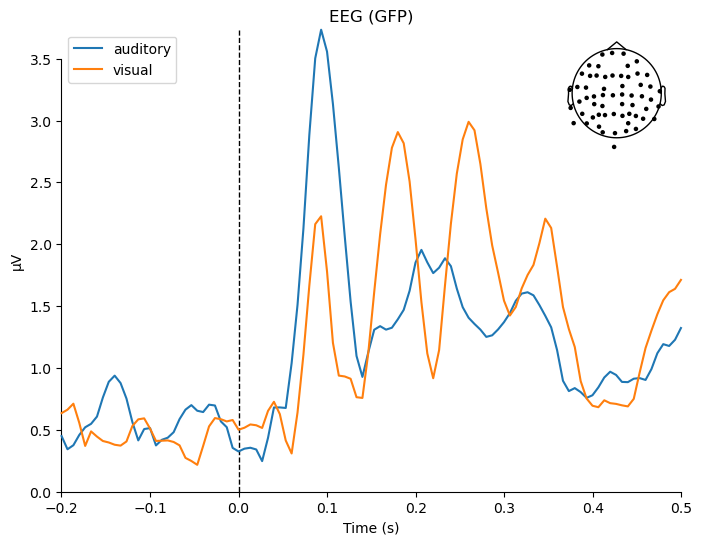

[<Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>,
 <Figure size 800x600 with 2 Axes>]

In [19]:
aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                             legend='upper left', show_sensors='upper right')

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


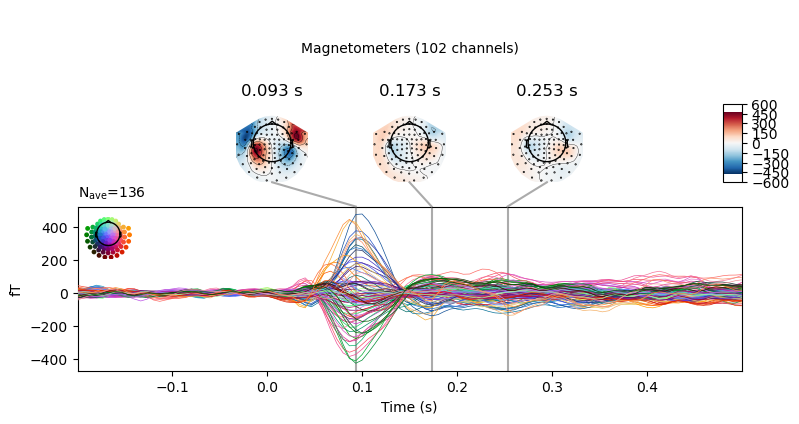

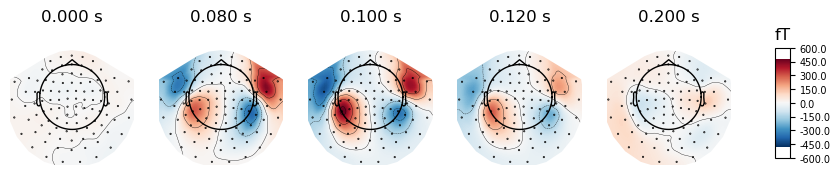

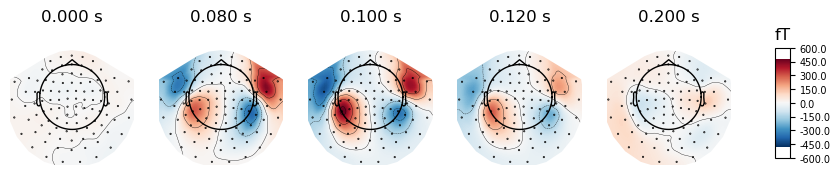

In [23]:
aud_evoked.plot_joint(picks='mag')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='mag')

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


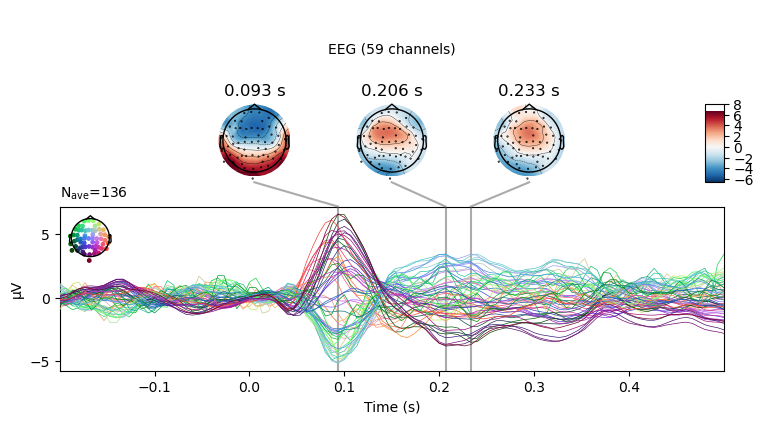

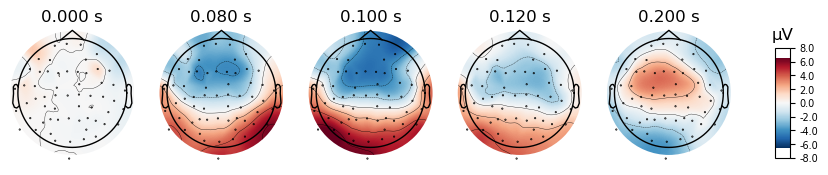

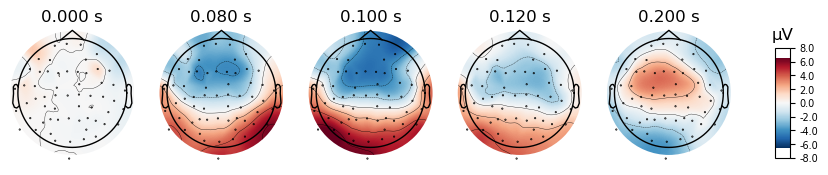

In [21]:
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


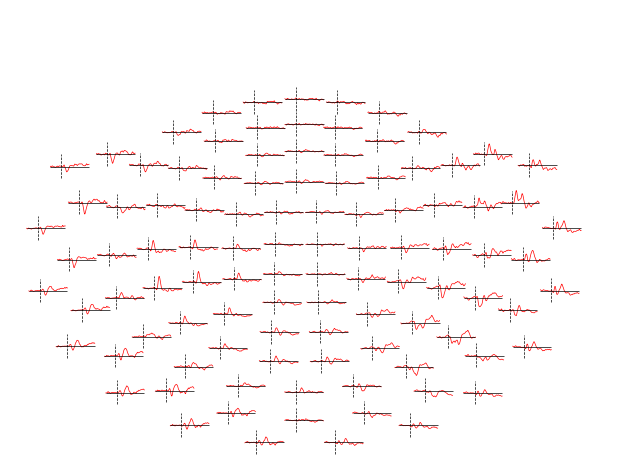

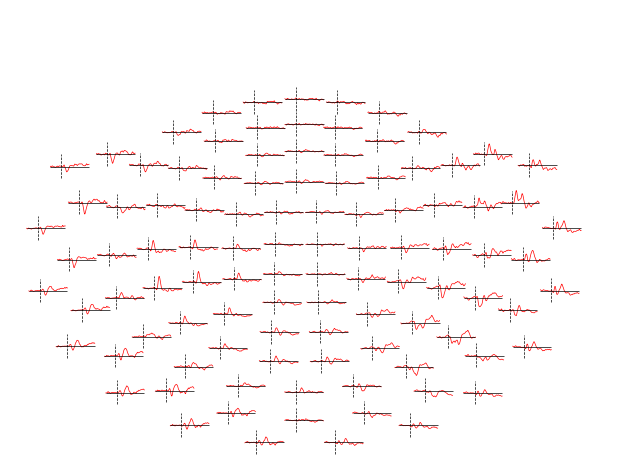

In [24]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
evoked_diff.pick_types(meg='mag').plot_topo(color='r', legend=False)

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


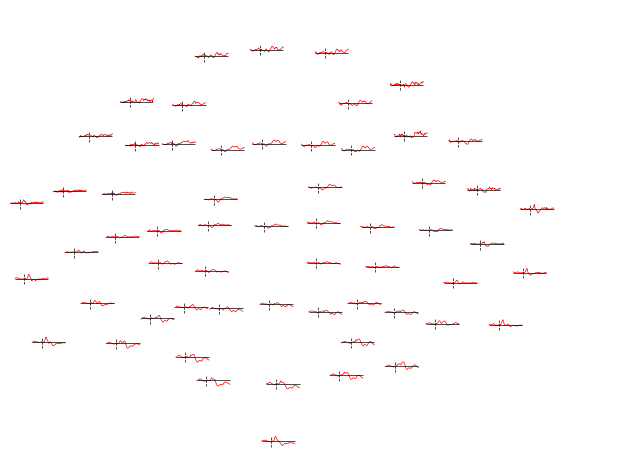

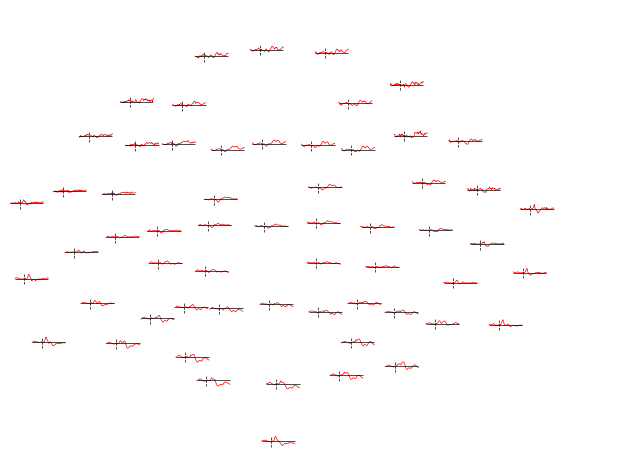

In [30]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
evoked_diff.pick_types(eeg=True).plot_topo(color='r', legend=False)

Finally, we can estimate the origins of the evoked activity by projecting the sensor data into this subject’s source space (a set of points either on the cortical surface or within the cortical volume of that subject, as estimated by structural MRI scans). MNE uses a linear inverse operator to project EEG+MEG sensor measurements into the source space. The inverse operator is computed from the forward solution for this subject and an estimate of the covariance of sensor measurements. 

MNE-Python mostly works with source spaces defined on the cortical surfaces estimated by FreeSurfer from a T1-weighted MRI image. See Head model and forward computation to read about how to compute a forward operator in a source space. The source space is defined by a set of points on the cortical surface, and the inverse operator is a linear mapping from sensor space to source space. The inverse operator is computed from the forward solution for this subject and an estimate of the covariance of sensor measurements.

In [31]:
# load inverse operator
# https://mne.tools/stable/generated/mne.minimum_norm.apply_inverse.html#mne.minimum_norm.apply_inverse
inverse_operator_file = (sample_data_folder / 'MEG' / 'sample' /
                         'sample_audvis-meg-oct-6-meg-inv.fif')
inv_operator = mne.minimum_norm.read_inverse_operator(inverse_operator_file)
# set signal-to-noise ratio (SNR) to compute regularization parameter (λ²)
snr = 3.
lambda2 = 1. / snr ** 2
# generate the source time course (STC)
stc = mne.minimum_norm.apply_inverse(vis_evoked, inv_operator,
                                     lambda2=lambda2,
                                     method='MNE')  # or dSPM, sLORETA, eLORETA

Reading inverse operator decomposition from /Users/riccardotedoldi/mne_data/MNE-sample-data/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif...
    Reading inverse operator info...
    [done]
    Reading inverse operator decomposition...
    [done]
    305 x 305 full covariance (kind = 1) found.
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Noise covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 2) found.
    Source covariance matrix read.
    22494 x 22494 diagonal covariance (kind = 6) found.
    Orientation priors read.
    22494 x 22494 diagonal covariance (kind = 5) found.
    Depth priors read.
    Did not find the desired covariance matrix (kind = 3)
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Co

In [32]:
# path to subjects' MRI files
subjects_dir = sample_data_folder / 'subjects'
# plot the STC
stc.plot(initial_time=0.1, hemi='split', views=['lat', 'med'],
         subjects_dir=subjects_dir)

Using pyvistaqt 3d backend.

Using control points [8.61922423e-11 1.06837855e-10 4.49139511e-10]


qt.qpa.fonts: Populating font family aliases took 303 ms. Replace uses of missing font family "Menlo" with one that exists to avoid this cost. 


Using control points [1.52279012e-10 2.12665488e-10 1.11695005e-09]


# montage and layout

Montages contain sensor positions in 3D (x, y, z in meters), which can be assigned to existing EEG/MEG data. By specifying the locations of sensors relative to the brain, Montages play an important role in computing the forward solution and inverse estimates. In contrast, Layouts are idealized 2D representations of sensor positions. 

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa

import mne

In [33]:
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)
for montage_name, montage_description in builtin_montages:
    print(f'{montage_name}: {montage_description}')

standard_1005: Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: BioSemi cap with 128 electrodes (1

In [34]:
easycap_montage = mne.channels.make_standard_montage('easycap-M1')
print(easycap_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 74 channels>


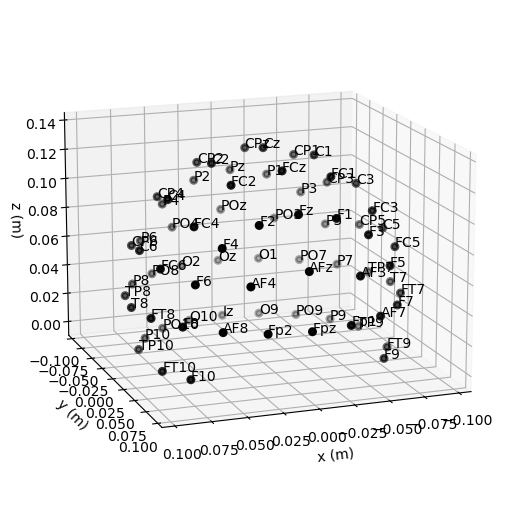

In [42]:
fig = easycap_montage.plot(kind='3d', show=False)  
fig = fig.gca().view_init(azim=70, elev=15)
plt.show()

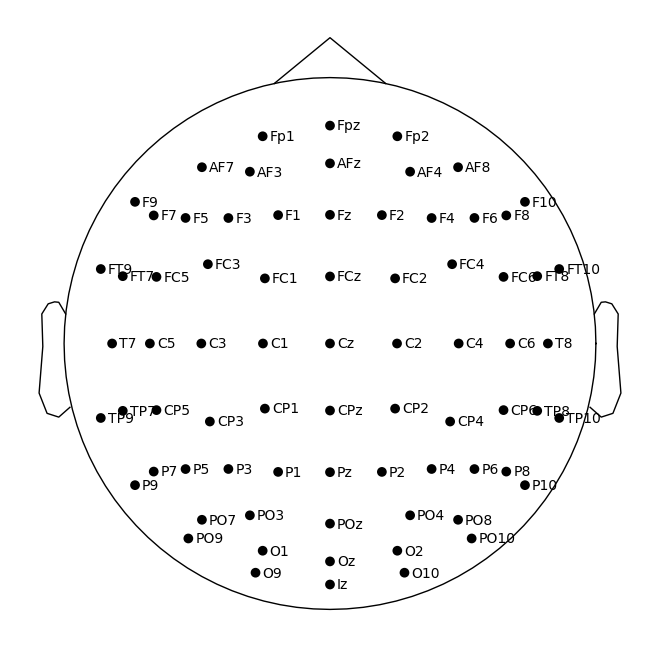

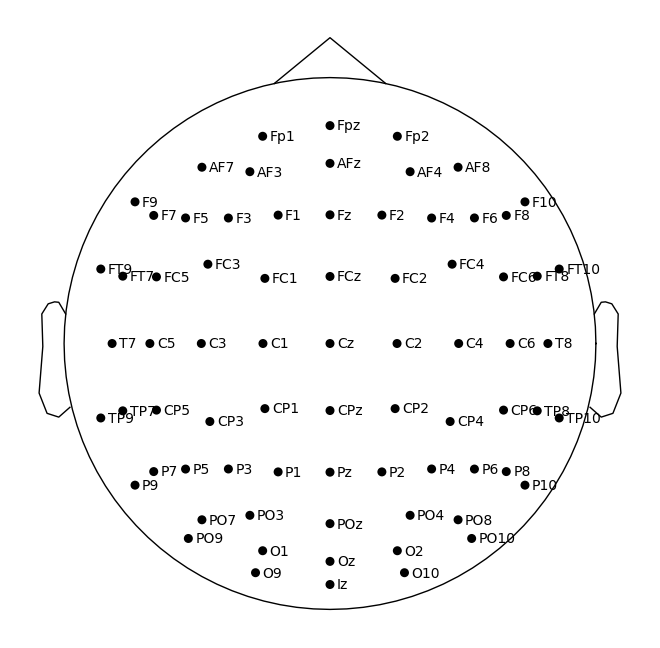

In [44]:
easycap_montage.plot()

# identify bad channels

In [47]:
print(raw.info['bads'])

['MEG 2443', 'EEG 053']


In [49]:
picks = mne.pick_channels_regexp(raw.ch_names, regexp='MEG 244.')
raw.plot(order=picks, n_channels=len(picks))

Using pyopengl with version 3.1.6


Channels marked as bad:
['EEG 053', 'MEG 2443']


319 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
319 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 4)
4 projection items activated
Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


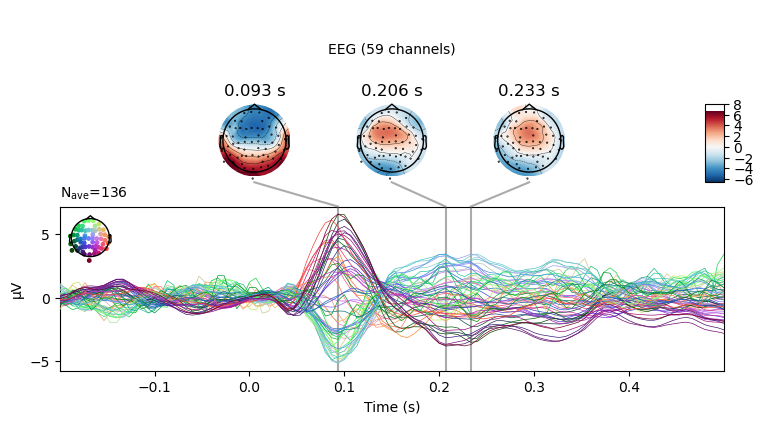

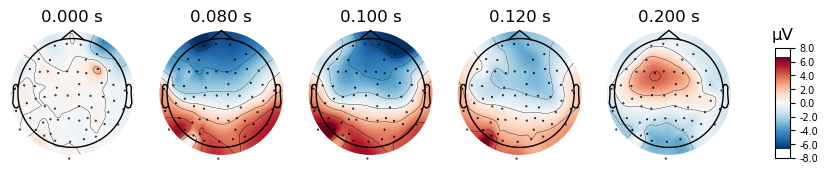

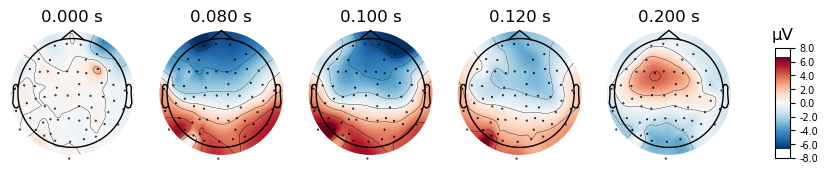

: 

In [53]:
raw2 = raw.copy()
raw2.info['bads'] = []
events = mne.find_events(raw2, stim_channel='STI 014')
epochs = mne.Epochs(raw2, events=events)['2'].average()

aud_evoked.plot_joint(picks='eeg')
epochs.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')


In [ ]:
import pandas as pd
import numpy as np

import mne
from mne import combine_evoked
from mne.minimum_norm import apply_inverse
from mne.datasets.brainstorm import bst_auditory
from mne.io import read_raw_ctf


# how to create a simulation
# https://mne.tools/dev/auto_tutorials/simulation/10_array_objs.html


################################################
############################### 1. Read the data
################################################

use_precomputed = True


data_path = bst_auditory.data_path()

subject = 'bst_auditory'
subjects_dir = data_path / 'subjects'

raw_fname1 = data_path / 'MEG' / subject / 'S01_AEF_20131218_01.ds'
raw_fname2 = data_path / 'MEG' / subject / 'S01_AEF_20131218_02.ds'
erm_fname = data_path / 'MEG' / subject / 'S01_Noise_20131218_01.ds'



raw = read_raw_ctf(raw_fname1)
n_times_run1 = raw.n_times

# Here we ignore that these have different device<->head transforms
mne.io.concatenate_raws(
    [raw, read_raw_ctf(raw_fname2)], on_mismatch='ignore')
raw_erm = read_raw_ctf(erm_fname)


raw.set_channel_types({'HEOG': 'eog', 'VEOG': 'eog', 'ECG': 'ecg'})
if not use_precomputed:
    # Leave out the two EEG channels for easier computation of forward.
    raw.pick(['meg', 'stim', 'misc', 'eog', 'ecg']).load_data()
    
    
    
annotations_df = pd.DataFrame()
offset = n_times_run1
for idx in [1, 2]:
    csv_fname = data_path / 'MEG' / 'bst_auditory' / f'events_bad_0{idx}.csv'
    df = pd.read_csv(csv_fname, header=None,
                     names=['onset', 'duration', 'id', 'label'])
    print('Events from run {0}:'.format(idx))
    print(df)

    df['onset'] += offset * (idx - 1)
    annotations_df = pd.concat([annotations_df, df], axis=0)



saccades_events = df[df['label'] == 'saccade'].values[:, :3].astype(int)



# Conversion from samples to times:
onsets = annotations_df['onset'].values / raw.info['sfreq']
durations = annotations_df['duration'].values / raw.info['sfreq']
descriptions = annotations_df['label'].values



annotations = mne.Annotations(onsets, durations, descriptions)
raw.set_annotations(annotations)
del onsets, durations, descriptions


print('Annotations:', raw.get_data('meg').shape)

# raw.plot_psd(fmax=50)
# raw.plot(duration=5, n_channels=30)

# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)